In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
jan_2019 = pd.read_csv('Jan_2019_ontime.csv')
jan_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [3]:
jan_2019.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
Unnamed: 21              float64
dtype: object

Matplotlib

In [4]:
jan_2019["OP_CARRIER"].value_counts()

WN    111312
AA     77017
DL     73836
OO     64926
UA     46915
YX     25755
MQ     25699
B6     24443
OH     23169
AS     20744
9E     20198
YV     18346
NK     15222
EV     13195
F9      9647
HA      6798
G4      6763
Name: OP_CARRIER, dtype: int64

In [5]:
grouped_airport = jan_2019.groupby("OP_CARRIER").mean().reset_index()
grouped_airport_best = grouped_airport.nsmallest(5, "DEP_DEL15")
grouped_airport_best

,OP_CARRIER,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
8,HA,15.795822,3.932627,19690.0,239.556340,12849.469256,1.284951e+06,12848.708444,1.284875e+06,1287.227212,0.086143,1434.137575,0.125424,0.001030,0.000883,739.772433,NaN
4,DL,16.326521,3.775516,19790.0,1780.442250,12327.388632,1.232743e+06,12327.678395,1.232772e+06,1331.503101,0.128693,1496.362802,0.128101,0.004442,0.001422,897.824720,NaN
2,AS,15.764896,3.879146,19930.0,764.461097,13559.994071,1.356003e+06,13561.059198,1.356110e+06,1324.052044,0.137193,1493.106697,0.173530,0.020681,0.005351,1315.055872,NaN
10,NK,15.560439,3.986467,20416.0,626.951912,12541.462686,1.254150e+06,12541.552358,1.254159e+06,1354.407279,0.144454,1453.284535,0.158771,0.013073,0.000920,1017.958678,NaN
11,OH,15.897794,3.867625,20397.0,5353.977384,11990.272821,1.199031e+06,11989.713022,1.198975e+06,1346.661276,0.148267,1481.506452,0.155349,0.032414,0.002115,388.296905,NaN


In [6]:
grouped_airport_worst = grouped_airport.nlargest(5, "DEP_DEL15")
grouped_airport_worst

,OP_CARRIER,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
3,B6,15.838195,3.852841,20409.0,1005.414311,12459.610809,1.245965e+06,12458.853905,1.245889e+06,1353.954801,0.271023,1402.191420,0.274802,0.040093,0.002782,1113.983922,NaN
6,F9,15.855706,3.974604,20436.0,1146.401990,12927.628382,1.292766e+06,12929.147714,1.292918e+06,1320.585191,0.245924,1458.118366,0.248894,0.015653,0.000622,1068.328392,NaN
7,G4,15.132633,4.262753,20368.0,1169.333284,12928.027798,1.292807e+06,12926.514712,1.292655e+06,1285.866776,0.214562,1498.796335,0.258142,0.007393,0.002809,909.691261,NaN
5,EV,15.727851,3.850398,20366.0,4188.061463,12550.069041,1.255011e+06,12550.484805,1.255052e+06,1336.828240,0.206570,1483.161528,0.247705,0.073058,0.002349,454.359985,NaN
12,OO,16.122447,3.819364,20304.0,4484.170132,12896.808105,1.289685e+06,12895.547839,1.289559e+06,1338.277419,0.204458,1485.720947,0.227036,0.043449,0.005160,498.414580,NaN


(-0.75, 4.75)

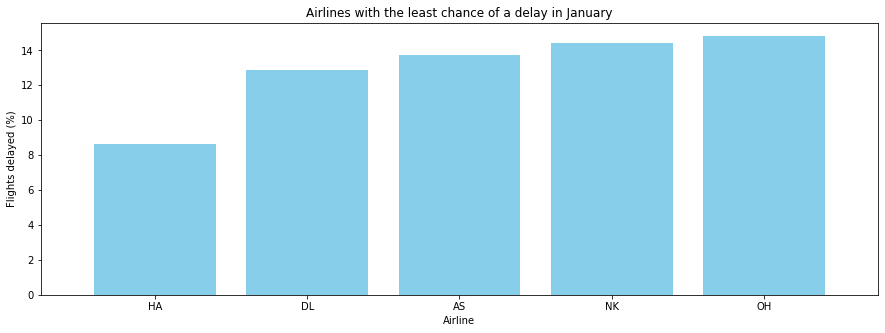

In [7]:
y_axis = grouped_airport_best["DEP_DEL15"] * 100
x_axis = grouped_airport_best["OP_CARRIER"]
plt.figure(figsize=(15,5))
plt.bar(x_axis, y_axis, color='skyblue', align="center")

    
plt.title("Airlines with the least chance of a delay in January")
plt.xlabel("Airline")
plt.ylabel("Flights delayed (%)")
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 4.75)

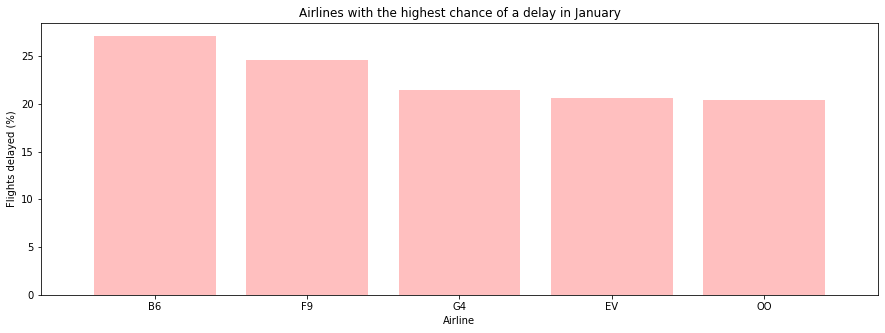

In [8]:
y_axis = grouped_airport_worst["DEP_DEL15"] * 100
x_axis = grouped_airport_worst["OP_CARRIER"]
plt.figure(figsize=(15,5))
plt.bar(x_axis, y_axis, color='r', alpha=0.25, align="center")

    
plt.title("Airlines with the highest chance of a delay in January")
plt.xlabel("Airline")
plt.ylabel("Flights delayed (%)")
plt.xlim(-0.75, len(x_axis)-0.25)

In [9]:
jan_2019['DEP_DEL15'].value_counts()

0.0    468703
1.0     98927
Name: DEP_DEL15, dtype: int64

In [10]:
jan_2019['CANCELLED'].value_counts()

0.0    567259
1.0     16726
Name: CANCELLED, dtype: int64

In [11]:
jan_2019['DIVERTED'].value_counts()

0.0    582689
1.0      1296
Name: DIVERTED, dtype: int64

In [12]:
jan_2019['ARR_DEL15'].value_counts()

0.0    460741
1.0    105222
Name: ARR_DEL15, dtype: int64

In [13]:
jan_2019['ORIGIN'].value_counts()

ATL    31155
ORD    26216
DFW    23063
CLT    19100
DEN    18507
       ...  
OGS       11
HGR       10
ADK        9
OWB        9
OGD        8
Name: ORIGIN, Length: 346, dtype: int64

In [14]:
jan_2019['ORIGIN'].describe()

count     583985
unique       346
top          ATL
freq       31155
Name: ORIGIN, dtype: object

In [15]:
jan_2019['DEST'].value_counts()

ATL    31151
ORD    26212
DFW    23078
CLT    19105
DEN    18498
       ...  
OGS       11
HGR       10
OWB        9
ADK        9
OGD        8
Name: DEST, Length: 346, dtype: int64

In [16]:
jan_2019_Ontime = jan_2019[jan_2019['DEP_DEL15']== 0.0]
jan_2019_Ontime.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [17]:
jan_2019_Ontime['DEP_DEL15'].value_counts()

0.0    468703
Name: DEP_DEL15, dtype: int64

In [18]:
remove_n = 368703
drop_indices = np.random.choice(jan_2019_Ontime.index, remove_n, replace=False)
jan_2019_Ontime_R = jan_2019_Ontime.drop(drop_indices)
jan_2019_Ontime_R.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
11,1,2,9E,20363,9E,N931XJ,3290,10874,1087402,CAK,...,ATL,557.0,0.0,0600-0659,737.0,0.0,0.0,0.0,528.0,NaN
19,1,2,9E,20363,9E,N304PQ,3297,11433,1143302,DTW,...,CVG,817.0,0.0,0800-0859,932.0,0.0,0.0,0.0,229.0,NaN
21,1,2,9E,20363,9E,N902XJ,3299,12339,1233904,IND,...,MSP,1111.0,0.0,1100-1159,1157.0,0.0,0.0,0.0,503.0,NaN
24,1,2,9E,20363,9E,N8928A,3301,11953,1195302,GNV,...,ATL,1740.0,0.0,1700-1759,1903.0,0.0,0.0,0.0,300.0,NaN
33,1,2,9E,20363,9E,N8908D,3308,10397,1039707,ATL,...,MGM,1957.0,0.0,2000-2059,1950.0,0.0,0.0,0.0,147.0,NaN


In [19]:
jan_2019_Ontime_R['DEP_DEL15'].value_counts()

0.0    100000
Name: DEP_DEL15, dtype: int64

In [20]:
jan_2019_Delayed = jan_2019[jan_2019['DEP_DEL15']==1.0]
jan_2019_Delayed.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
16,1,2,9E,20363,9E,N232PQ,3295,11433,1143302,DTW,...,EWR,1353.0,1.0,1200-1259,1521.0,1.0,0.0,0.0,488.0,NaN
55,1,2,9E,20363,9E,N905XJ,3328,11193,1119302,CVG,...,MSP,817.0,1.0,0700-0759,900.0,1.0,0.0,0.0,596.0,NaN
66,1,2,9E,20363,9E,N833AY,3338,13277,1327702,MGM,...,ATL,1411.0,1.0,1100-1159,1558.0,1.0,0.0,0.0,147.0,NaN
75,1,2,9E,20363,9E,N905XJ,3344,13487,1348702,MSP,...,OMA,939.0,1.0,0800-0859,1043.0,0.0,0.0,0.0,282.0,NaN
84,1,2,9E,20363,9E,N833AY,3355,10397,1039707,ATL,...,ILM,1701.0,1.0,1600-1659,1814.0,0.0,0.0,0.0,377.0,NaN


In [21]:
jan_2019_Delayed['DEP_DEL15'].value_counts()

1.0    98927
Name: DEP_DEL15, dtype: int64

In [22]:
jan_2019_Balanced = pd.concat([jan_2019_Ontime_R,jan_2019_Delayed])
jan_2019_Balanced.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
11,1,2,9E,20363,9E,N931XJ,3290,10874,1087402,CAK,...,ATL,557.0,0.0,0600-0659,737.0,0.0,0.0,0.0,528.0,NaN
19,1,2,9E,20363,9E,N304PQ,3297,11433,1143302,DTW,...,CVG,817.0,0.0,0800-0859,932.0,0.0,0.0,0.0,229.0,NaN
21,1,2,9E,20363,9E,N902XJ,3299,12339,1233904,IND,...,MSP,1111.0,0.0,1100-1159,1157.0,0.0,0.0,0.0,503.0,NaN
24,1,2,9E,20363,9E,N8928A,3301,11953,1195302,GNV,...,ATL,1740.0,0.0,1700-1759,1903.0,0.0,0.0,0.0,300.0,NaN
33,1,2,9E,20363,9E,N8908D,3308,10397,1039707,ATL,...,MGM,1957.0,0.0,2000-2059,1950.0,0.0,0.0,0.0,147.0,NaN


In [23]:
jan_2019_Balanced['DEP_DEL15'].value_counts()

0.0    100000
1.0     98927
Name: DEP_DEL15, dtype: int64

In [24]:
jan_2019.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
Unnamed: 21              float64
dtype: object

In [25]:
jan_2019_Balanced['Unnamed: 21'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 21, dtype: float64

In [26]:
jan_2019_Balanced_Dropped=jan_2019_Balanced.drop(columns={'OP_UNIQUE_CARRIER','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID','DEP_TIME_BLK','Unnamed: 21'})

jan_2019_Balanced_Dropped.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
11,1,2,20363,9E,10874,CAK,10397,ATL,557.0,0.0,737.0,0.0,0.0,0.0,528.0
19,1,2,20363,9E,11433,DTW,11193,CVG,817.0,0.0,932.0,0.0,0.0,0.0,229.0
21,1,2,20363,9E,12339,IND,13487,MSP,1111.0,0.0,1157.0,0.0,0.0,0.0,503.0
24,1,2,20363,9E,11953,GNV,10397,ATL,1740.0,0.0,1903.0,0.0,0.0,0.0,300.0
33,1,2,20363,9E,10397,ATL,13277,MGM,1957.0,0.0,1950.0,0.0,0.0,0.0,147.0


In [27]:
y = jan_2019_Balanced_Dropped['DEP_DEL15']
X = jan_2019_Balanced_Dropped.drop(columns="DEP_DEL15",axis=1)
X.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
11,1,2,20363,9E,10874,CAK,10397,ATL,557.0,737.0,0.0,0.0,0.0,528.0
19,1,2,20363,9E,11433,DTW,11193,CVG,817.0,932.0,0.0,0.0,0.0,229.0
21,1,2,20363,9E,12339,IND,13487,MSP,1111.0,1157.0,0.0,0.0,0.0,503.0
24,1,2,20363,9E,11953,GNV,10397,ATL,1740.0,1903.0,0.0,0.0,0.0,300.0
33,1,2,20363,9E,10397,ATL,13277,MGM,1957.0,1950.0,0.0,0.0,0.0,147.0


In [28]:
names = X.columns.to_list()
names

['DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'OP_CARRIER_AIRLINE_ID',
 'OP_CARRIER',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN',
 'DEST_AIRPORT_ID',
 'DEST',
 'DEP_TIME',
 'ARR_TIME',
 'ARR_DEL15',
 'CANCELLED',
 'DIVERTED',
 'DISTANCE']

In [29]:
cat = X.select_dtypes(include="object").columns.to_list()
cat

['OP_CARRIER', 'ORIGIN', 'DEST']

In [30]:
num =  X.select_dtypes(exclude="object").columns.to_list()
num

['DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'OP_CARRIER_AIRLINE_ID',
 'ORIGIN_AIRPORT_ID',
 'DEST_AIRPORT_ID',
 'DEP_TIME',
 'ARR_TIME',
 'ARR_DEL15',
 'CANCELLED',
 'DIVERTED',
 'DISTANCE']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectFromModel

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [33]:
cat_pip = Pipeline([
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ("one_hot",OneHotEncoder(sparse=False,handle_unknown='ignore'))
])
num_pip = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])

data_processing = ColumnTransformer([
    ('cat',cat_pip,cat),
    ('num',num_pip,num)
])


RandomForestClassifier - Default

In [34]:
rf_1 = RandomForestClassifier(verbose=1)

In [35]:
model_rf = Pipeline([
    ('processing', data_processing),
    ('classify', rf_1)
])

In [36]:
model_rf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.9s finished


Pipeline(memory=None,
         steps=[('processing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                        

Saving the model

In [37]:
from joblib import dump, load

In [38]:
dump(model_rf, 'rf.pkl')

['rf.pkl']

In [39]:
model_rf_load = load("rf.pkl")

In [40]:
print('Train Acc: %.3f' % model_rf_load.score(X_train, y_train))
print('Test Acc: %.3f' % model_rf_load.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


Train Acc: 0.989


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test Acc: 0.865


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


Checking random forest classifier prediction

In [41]:
encoded_predictions = model_rf_load.predict(X_test[:5])
print(f"Predicted classes: {encoded_predictions}")
print(f"Actual classes: {list(y_test[:5])}")

Predicted classes: [0. 0. 1. 1. 1.]
Actual classes: [0.0, 0.0, 1.0, 1.0, 0.0]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier - Params

In [42]:
rf_2 = RandomForestClassifier(n_estimators=200, max_depth=7, verbose=2, n_jobs=2)

In [43]:
rf_2 = RandomForestClassifier()

In [44]:
model_rf_2 = Pipeline([
    ('processing', data_processing),
    ('classify', rf_2)
])

In [45]:
model_rf_2.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('processing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                        

In [46]:
dump(model_rf_2, 'rf_2.pkl')

['rf_2.pkl']

In [47]:
model_rf_2_load = load("rf_2.pkl")

In [48]:
print('Train Acc: %.3f' % model_rf_2_load.score(X_train, y_train))
print('Test Acc: %.3f' % model_rf_2_load.score(X_test, y_test))

Train Acc: 0.989
Test Acc: 0.866


Checking random forest classifier (2nd model) prediction

In [49]:
encoded_predictions = model_rf_2_load.predict(X_test[:5])
print(f"Predicted classes: {encoded_predictions}")
print(f"Actual classes: {list(y_test[:5])}")

Predicted classes: [0. 0. 1. 1. 0.]
Actual classes: [0.0, 0.0, 1.0, 1.0, 0.0]


GradientBoostingClassifier

In [50]:
gbc = GradientBoostingClassifier(n_estimators=50, max_depth=3, verbose=1)

In [51]:
model = Pipeline([
    ('processing', data_processing),
    ('feature_selection', SelectFromModel(gbc)),
    ('classify', gbc)
])

In [52]:
model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2782            7.48m
         2           1.1900            7.75m
         3           1.1170            7.28m
         4           1.0561            7.01m
         5           1.0050            6.84m
         6           0.9617            6.60m
         7           0.9251            6.35m
         8           0.8937            6.17m
         9           0.8673            5.96m
        10           0.8445            5.78m
        20           0.7359            4.42m
        30           0.7099            2.97m
        40           0.7003            1.46m
        50           0.6955            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2782            3.93s
         2           1.1900            3.81s
         3           1.1170            3.87s
         4           1.0561            4.06s
         5           1.0050            3.90s
         6           0.9617            3.84s
        

Pipeline(memory=None,
         steps=[('processing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                        

Loading the model

In [53]:
dump(model, 'gbc.pkl')

['gbc.pkl']

In [54]:
model_load = load("gbc.pkl")

In [55]:
print('Train Acc: %.3f' % model_load.score(X_train, y_train))
print('Test Acc: %.3f' % model_load.score(X_test, y_test))

Train Acc: 0.870
Test Acc: 0.870


Checking gradient boosting classifier prediction

In [56]:
encoded_predictions = model_load.predict(X_test[:5])
print(f"Predicted classes: {encoded_predictions}")
print(f"Actual classes: {list(y_test[:5])}")

Predicted classes: [0. 0. 1. 1. 1.]
Actual classes: [0.0, 0.0, 1.0, 1.0, 0.0]
